# Homework 1

## Chenxi Jiang - cj2706

### Due: Friday Oct 7th 11:59pm ET

In this homework we'll do some data exploration and perform a hypothesis test.


## Instructions

Follow the comments below and fill in the blanks (____) to complete.

When completed, 
 1. Replace Name and UNI in the first cell and filename
 2. Kernel -> Restart & Run All to run all cells in order 
 3. Print Preview -> Print (Landscape Layout) -> Save to pdf 
 4. Post pdf to GradeScope



# Environment Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

sns.set_style('darkgrid')

%matplotlib inline

## Part 1: Data Exploration

One data science task, and a common one used for data science interviews, is to predict defaults on loans.<br>
We're going to load a subset of a common loan dataset and explore some of the features.

Here is a brief description of the features included:

- **purpose**: The purpose of the loan, such as: credit_card, debt_consolidation, etc.
- **annual_inc**: Annual income of the borrower
- **home_ownership**: The borrower's relationship with their primary residence
- **loan_amnt**: The amount of money applied for
- **outcome**: The result of the loan: paid off or default

In [2]:
# 1. (1pt) Load the data from ../data/loan_data_subset.csv into the variable df 
#    using the column 'id' as the index with index_col='id'
#    note: use the default separator ','

df = pd. read_csv('../data/loan_data_subset.csv',sep = ',', header = 0,index_col='id')

In [3]:
# 2. (1pt) Using .shape, how many rows and columns does the dataset have?

print(f'dataframe has {df. shape[0]} rows and {df. shape[1]} columns.')

dataframe has 1000 rows and 5 columns.


In [4]:
# 3. (1pt) Display the first 3 rows of the dataset using .head()

df.head(3)

,purpose,annual_inc,home_ownership,loan_amnt,outcome
id,,,,,
id0,credit_card,40000,MORTGAGE,7875,paid off
id1,debt_consolidation,47000,MORTGAGE,9325,paid off
id2,debt_consolidation,28264,RENT,10600,paid off


In [5]:
# 4. (1pt) Print out the first 3 rows of the numeric feature columns included in the dataset 
#    (3 rows x 2 columns)
#df.dtypes
df[['annual_inc','loan_amnt']].head(3)

,annual_inc,loan_amnt
id,,
id0,40000,7875
id1,47000,9325
id2,28264,10600


In [6]:
# 5. (1pt) Print out the first 3 rows of the the categorical feature columns in the dataset
#    (3 rows x 3 columns)
df[['purpose','home_ownership','outcome']].head(3)

,purpose,home_ownership,outcome
id,,,
id0,credit_card,MORTGAGE,paid off
id1,debt_consolidation,MORTGAGE,paid off
id2,debt_consolidation,RENT,paid off


In [7]:
# 6. (1pt) Display all columns for rows with id from id100 to id102 inclusive
#    We should see 3 rows, 5 columns

df.loc['id100':'id102']

,purpose,annual_inc,home_ownership,loan_amnt,outcome
id,,,,,
id100,credit_card,75000,RENT,10000,paid off
id101,other,72000,RENT,3000,paid off
id102,debt_consolidation,79000,RENT,16000,paid off


In [8]:
# 7. (3pt) Display annual_inc and home_ownership columns for the 3 rows with highest annual_inc
#    We should see 3 rows, 2 columns
(df.sort_values(by= ['annual_inc'], ascending = False)[['annual_inc','home_ownership']]).head(3)

,annual_inc,home_ownership
id,,
id768,367000,MORTGAGE
id201,334000,OWN
id419,310000,MORTGAGE


In [9]:
# 8. (3pt) What is the mean annual_inc for rows with:
#        (loan_amnt greater than the median loan_amnt) and
#        (outcome of 'paid off') and
#        (home_ownership of 'MORTGAGE' or 'OWN')

df1 = df.loc[(df.outcome == 'paid off')& (df.loan_amnt > df.loan_amnt.median())
           &((df.home_ownership=='MORTGAGE')|(df.home_ownership=='OWN'))]
mean_annual_inc = df1.annual_inc.mean()

# Print the mean annual income found with precision of 2
print(f'{mean_annual_inc = :0.2f}')

mean_annual_inc = 98223.29


In [10]:
# 9. (1pt) Calculate frequencies of the different values seen in column 'purpose' using .value_counts()
#    Store in purpose_counts.

purpose_counts = df.purpose.value_counts()

print(purpose_counts)

debt_consolidation    542
credit_card           173
other                  93
home_improvement       62
major_purchase         34
small_business         33
medical                15
wedding                15
moving                 12
house                  10
car                     7
vacation                4
Name: purpose, dtype: int64


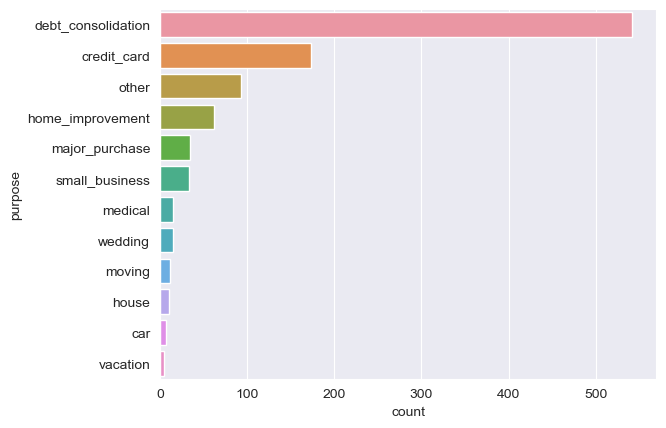

In [11]:
# 10. (3pt) Plot the frequency of each of the categories seen in the 'purpose' column using sns.countplot()
#   Order the bars using the purpose_counts.index, generated in the cell above, 
#      which is sorted by frequency by default. (use the order= argument in sns.countplot())
#   Because there are many values, and some of the labels are long, 
#      place 'purpose' on the y-axis instead of the x-axis (use y= instead of x=).

ax=sns.countplot(y=df.purpose,order=purpose_counts.index)

In [12]:
# 11. (2pt) What is the mean loan_amnt for each category in purpose?
#     Use groupby()
#     Sort the resulting series by value ascending (default)
df.groupby('purpose').mean().sort_values('loan_amnt', ascending=True).iloc[:,0:1]

,annual_inc
purpose,
moving,57632.083333
car,50428.000000
medical,68125.400000
vacation,89185.000000
wedding,63851.600000
other,60770.150538
major_purchase,88635.764706
home_improvement,73382.516129
credit_card,68361.132948


In [13]:
# 12. (1pt) Display the summary statistics of annual_inc using .describe()
#     Round all values to the hundredths place (precision of 2) using .round()
df.annual_inc.describe().round(2)

count      1000.00
mean      68158.89
std       40271.75
min       10000.00
25%       42000.00
50%       60000.00
75%       83000.00
max      367000.00
Name: annual_inc, dtype: float64

In [14]:
# 13. (2pt) There appears to be a fairly large difference between mean and median in annual_inc.
#   Print out the absolute difference in mean annual_inc and median annual_inc to a precision of 2
#   To calculate the absolute value, use np.abs()

annual_inc_mean = df.annual_inc.mean()
annual_inc_median = df.annual_inc.median()

print(f'absolute difference ={np.abs(annual_inc_mean-annual_inc_median):0.2f}')

absolute difference =8158.89


<AxesSubplot: xlabel='annual_inc'>

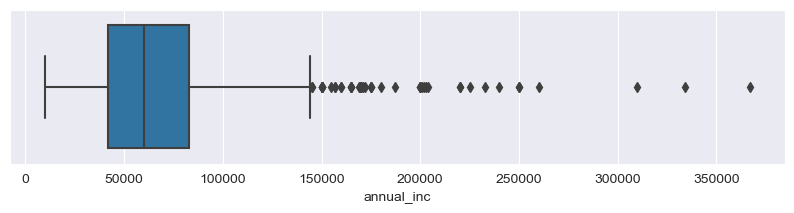

In [15]:
# 14. (2pt) Display a boxplot of annual_inc using sns.boxplot.

#  To make a wide plot, use plt.subplots with 1 row, 1 column of axes and a figsize of (10,2)
fig,ax = plt.subplots(1,1,figsize=(10,2))

#  Plot a boxplot of annual_inc using sns.boxplot() and ax with annual_inc on the x-axis
sns.boxplot(x=df.annual_inc,ax=ax)

In [16]:
# 15. (1pt) We'll remove some of records with the highest annual_inc, treating them as outliers.
#    What is the 95th percentile of annual_inc? (use .percentile() from numpy or .quantile() from pandas)
#    Eg. Where is the cutoff where we remove extremely high values but keep 95% of the data?

annual_inc_95 = np.percentile(df.annual_inc, 95)

print(f'95th percentile of annual_inc: {annual_inc_95:0.2f}')

95th percentile of annual_inc: 141195.95


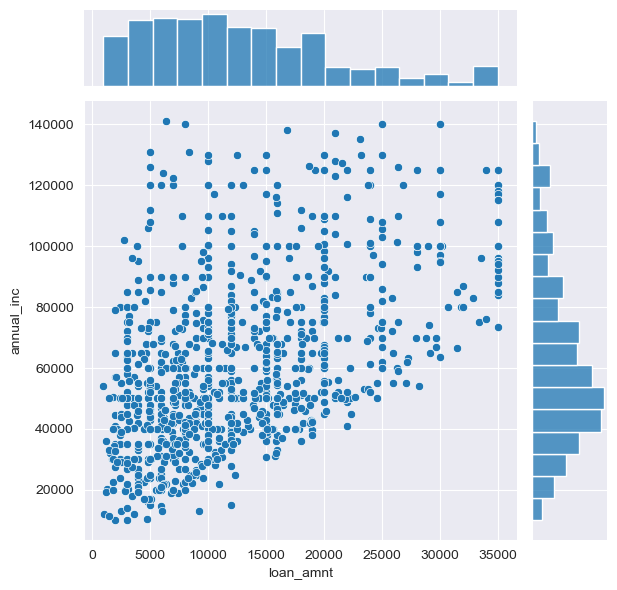

In [17]:
# 16. (3pt) Plot loan_amnt (x-axis) against annual_inc (y-axis) using sns.jointplot(), excluding outliers
#     Only include rows where annual_inc < annual_inc_95
#     Set alpha=0.3 to add transparency to markers
sns.jointplot(x= 'loan_amnt', y= 'annual_inc', data=df. loc[df. annual_inc < annual_inc_95])

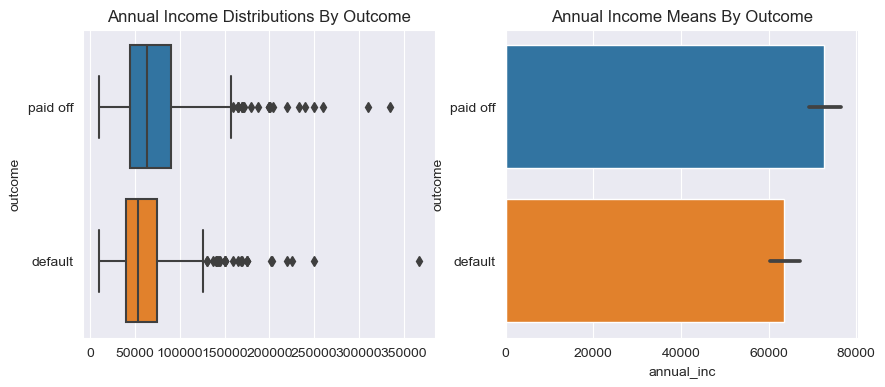

In [18]:
# 17. (5pt) Visualize annual income (annual_inc) by outcome.
#     Outcome takes two values: 'paid off' and 'default'

# NOTE: In all of the below use all rows of df, no longer limiting to df.annual_inc < annual_inc_95

# Here we'll create 2 plots, one that compares the distributions of annual_inc by outcome,
# the other comparing the mean of annual_inc by outcome

# Create a subplot with 2 rows and 1 column with figsize of (10,4)
# Use sharex=True to share the x-axis across the two plots
# Capture the return values of plt.subplots() as fig,ax
fig,ax = plt.subplots(1,2,figsize=(10,4))

# On the first axis (ax[0]) use sns.boxplot() to compare the distribution of annual_inc by outcome
#   Place 'annual_inc' on the x-axis and 'outcome' on the y-axis.

sns.boxplot(x=df.annual_inc,y=df.outcome,ax=ax[0])

# Set the title on the first axis ax[0] to be 'Annual Income Distributions By Outcome'
ax[0].set_title('Annual Income Distributions By Outcome')

# On the second axis (ax[1]) use sns.barplot() to compare the means of annual_inc by outcome
#   Place 'annual_inc' on the x-axis and 'outcome' on the y-axis.
sns.barplot(x=df.annual_inc,y=df.outcome,estimator=np.mean,ax=ax[1])

# Set the title on the second plot to be 'Annual Income Means By Outcome'
ax[1].set_title('Annual Income Means By Outcome')

# Remove the label on the x-axis of ax[0] using set_xlabel() (as it overlaps with the ax[1] title)
ax[0].set_xlabel(None);

## Part 2: Hypothesis Testing

The plots in the question above indicate a difference in annual_inc by outcome.

Let's test the hypothesis that there is a difference in mean annual_inc for loans with an outcome of 'paid off' vs loans with an outcome of 'default'.

In [19]:
# 18. (3pt) Calculate the difference in mean annual_inc between 'paid off' and 'default' 
#     Use: mean_annual_inc_paid_off - mean_annual_inc_default

# Calculate the mean value for each group
mean_annual_inc_paid_off = df[df.outcome == 'paid off'].annual_inc.mean()
mean_annual_inc_default = df[df.outcome == 'default'].annual_inc.mean()
observed_mean_diff = mean_annual_inc_paid_off-mean_annual_inc_default

# Print the the value of observed_mean_diff with a precision of 2
print('observed_mean_diff: {:0.2f}'.format(observed_mean_diff))

observed_mean_diff: 9062.74


In [20]:
# 19. (5pt) We'll perform a permutation test to see how significant this difference is
#    by generating 1,000 random permutation samples of mean difference

rand_mean_diffs = [] 
n_samples = 1000
n_paid_off =(df.outcome == 'paid off').sum()# the number of observations (rows) with outcome of 'paid off'
print(f'{n_paid_off = :d}')

for i in range(n_samples):
    
    # Get a random permutation of df.annual_inc
    # Use the pandas .sample() function with 
    #    sample size the same size as original dataset
    #    sampling without replacement
    #    random_state == i (the index of the loop) for consistency in grading
    rand_perm = df.annual_inc.sample(frac=1,replace=False,random_state=i)
    
    # Take the mean of the first n_paid_off random values
    rand_mean_paid_off = rand_perm[:n_paid_off].mean()
    
    # Take the mean of the remaining random values
    rand_mean_default = rand_perm[n_paid_off:].mean()
    
    # Append the difference (rand_mean_paid_off - rand_mean_default) to the list rand_mean_diffs
    rand_mean_diffs.append(rand_mean_paid_off - rand_mean_default)
    
# Convert rand_mean_diffs into a numpy array so we can use numpy functions
rand_mean_diffs = np.array(rand_mean_diffs)
    
# check that we have the correct amount of data by asserting that the length of rand_mean_diffs == n_samples
assert rand_mean_diffs.shape[0] == n_samples

# check that we only have one array of differences
assert rand_mean_diffs.ndim == 1

# Display the first three values in rand_mean_diffs so we know when it's done.
rand_mean_diffs[:3]

n_paid_off = 500


array([ 2323.292,  3927.652, -4313.772])

In [21]:
# 20. (5pt) Before we plot the data, let's transform all values to their z-score

# Calculate the sample mean of our rand_mean_diffs using .mean()
mean_rand_mean_diffs = rand_mean_diffs.mean()

# Calculate the sample standard deviation using .std()
std_rand_mean_diffs = rand_mean_diffs.std()

# Transform rand_mean_diffs to rand_mean_diffs_zscore by 
#    first subtracting the mean and 
#    then dividing by the std dev
rand_mean_diffs_zscore =(rand_mean_diffs - mean_rand_mean_diffs) / std_rand_mean_diffs

# Transform the observed_mean_diff as well by subtracting the mean and dividing by the std dev
observed_mean_diff_zscore = (observed_mean_diff - mean_rand_mean_diffs) / std_rand_mean_diffs

# To check our transformation, check that the zscore mean is near 0 and std dev is near 1
print(f'{rand_mean_diffs_zscore.mean() = :0.3f}')
print(f'{rand_mean_diffs_zscore.std()  = :0.3f}')
print(f'{observed_mean_diff_zscore     = :0.3f}')

assert np.abs(rand_mean_diffs_zscore.mean() - 0) < .0001, 'rand_mean_diffs_zscore.mean() should be close to zero'
assert np.abs(rand_mean_diffs_zscore.std()  - 1) < .0001, 'rand_mean_diffs_zscore.std() should be close to 1'

rand_mean_diffs_zscore.mean() = 0.000
rand_mean_diffs_zscore.std()  = 1.000
observed_mean_diff_zscore     = 3.415


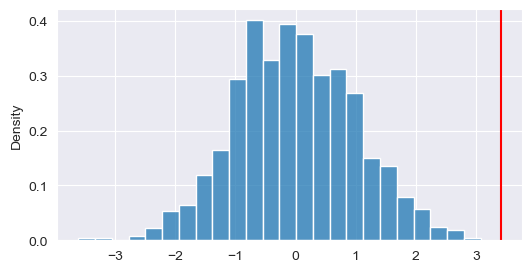

In [22]:
# 21. (2pt) Plot our observed metric against our samples.

# Use subplots to create a figure with 1 row, 1 columna and figsize of (6,3)
fig,ax = plt.subplots(1,1,figsize=(6,3))

# Use seaborn histplot to plot the distribution of rand_mean_diffs_zscore on ax
ax = sns.histplot(rand_mean_diffs_zscore, stat='density')

# Use ax.axvline() to plot a line at our observed_mean_diff_zscore
# Make the line red using color='r'
ax.axvline(observed_mean_diff_zscore,color='r')

In [23]:
# 22. (3pt) The plot seems to indicate a real difference in values. What is the p-value?
#    Calculate a two-tailed p_value using np.abs()
#    Recall that we want the proportion of random samples (rand_mean_diffs_zscore) with an absolute value
#      greater than or equal to the absolute value of the observed difference (observed_mean_diff_zscore).
gt = np.abs(np.array(rand_mean_diffs)) >= np.abs(observed_mean_diff)
num_gt = gt.sum()
p_value = num_gt / len(rand_mean_diffs)

# print the p-value found
p_value

0.001